 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [92]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [93]:
# Set all file path
csvpath_whale = Path("Resources/whale_returns.csv")
csvpath_algo = Path("Resources/algo_returns.csv")
csvpath_sp_tsx_history = Path("Resources/sp_tsx_history.csv")
csvpath_apple = Path("Resources/GoogleFinance - Apple.csv")
csvpath_microsoft = Path("Resources/GoogleFinance-Microsoft.csv")
csvpath_brookfield = Path("Resources/GoogleFinance-Brookfield Asset Management Inc.csv")

In [94]:
# Reading whale returns
whale_df = pd.read_csv(csvpath_whale, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Sort whale dataframe
whale_df.sort_index
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [95]:
# Count nulls
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [96]:
# Drop nulls
whale_df = whale_df.dropna().copy()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [97]:
# Reading algorithmic returns
algo_df = pd.read_csv(csvpath_algo, index_col="Date",parse_dates=True, infer_datetime_format=True)

# Sort Algo dataframe
algo_df.sort_index
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [98]:
# Count nulls
algo_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [99]:
# Drop nulls
algo_df = algo_df.dropna().copy()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [100]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_df = pd.read_csv(csvpath_sp_tsx_history, index_col="Date",parse_dates=True, infer_datetime_format=True)

# Sort S&P TSX 60 dataframe
sp_tsx_df.sort_index
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [101]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [102]:
# Fix Data Types: Close column has currency format i.e., $12,000.00. Thus need to remove "$" and "," and parce it to float to be calculable
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$","")
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",","")
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float")

C:\Users\keito\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [103]:
# Calculate Daily Returns
sp_tsx_daily_rtn = sp_tsx_df.pct_change()

In [104]:
# Drop nulls
sp_tsx_daily_rtn = sp_tsx_daily_rtn.dropna().copy()

In [105]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_rtn = sp_tsx_daily_rtn.rename(columns={"Close": "S&P TSX"})
sp_tsx_daily_rtn.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_w_a_sp = pd.concat([whale_df,algo_df,sp_tsx_daily_rtn], axis="columns", join="inner")
joined_w_a_sp

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Return of all portfolios'}, xlabel='Date'>

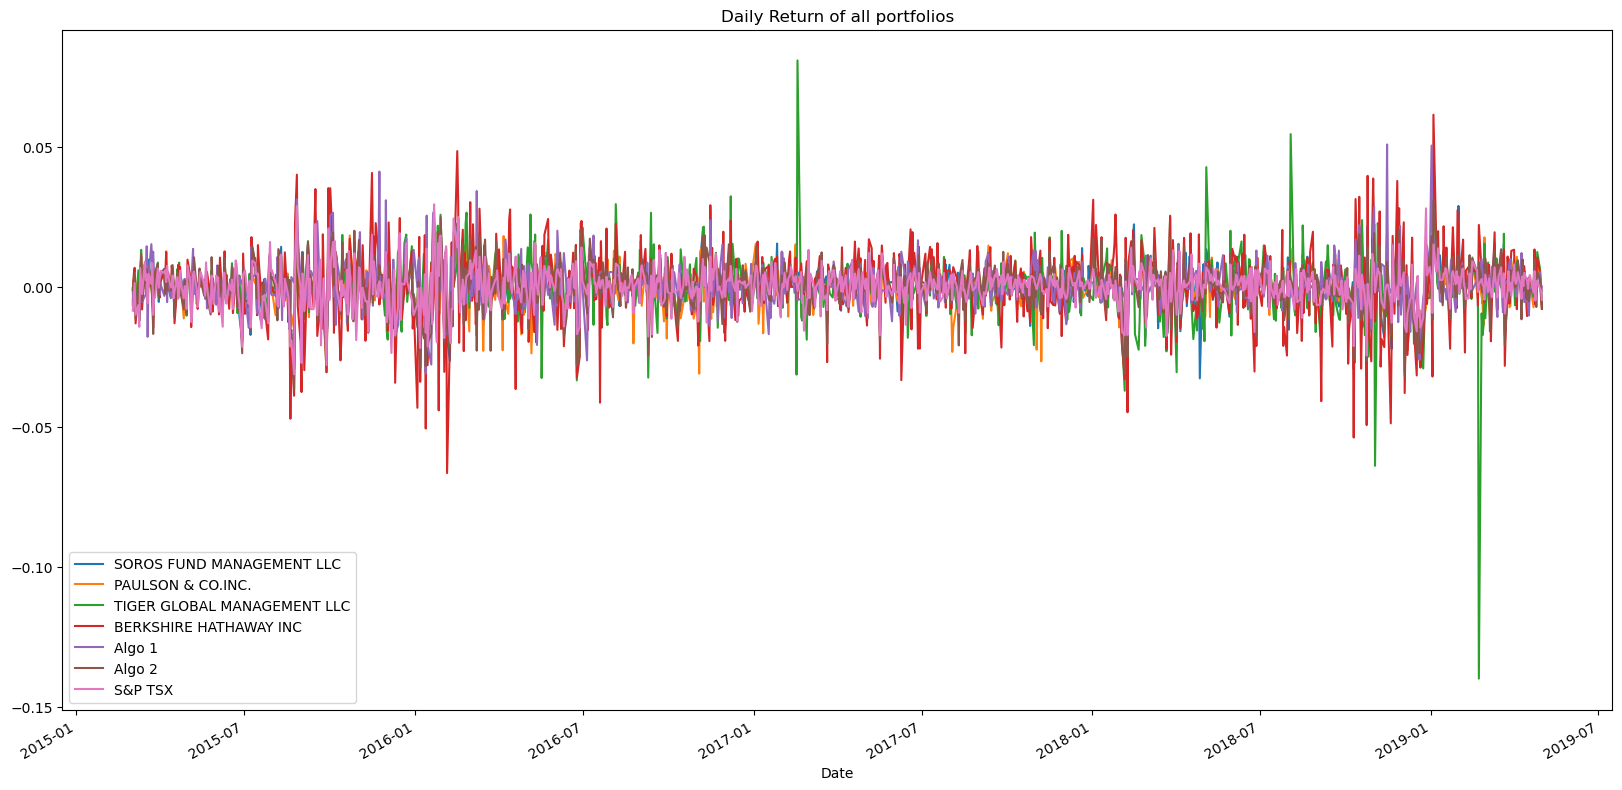

In [16]:
# Plot daily returns of all portfolios
joined_w_a_sp.plot(figsize=(20,10), title="Daily Return of all portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns for Whale, Algorithmic, and S&P TSX 60 Returns'}, xlabel='Date'>

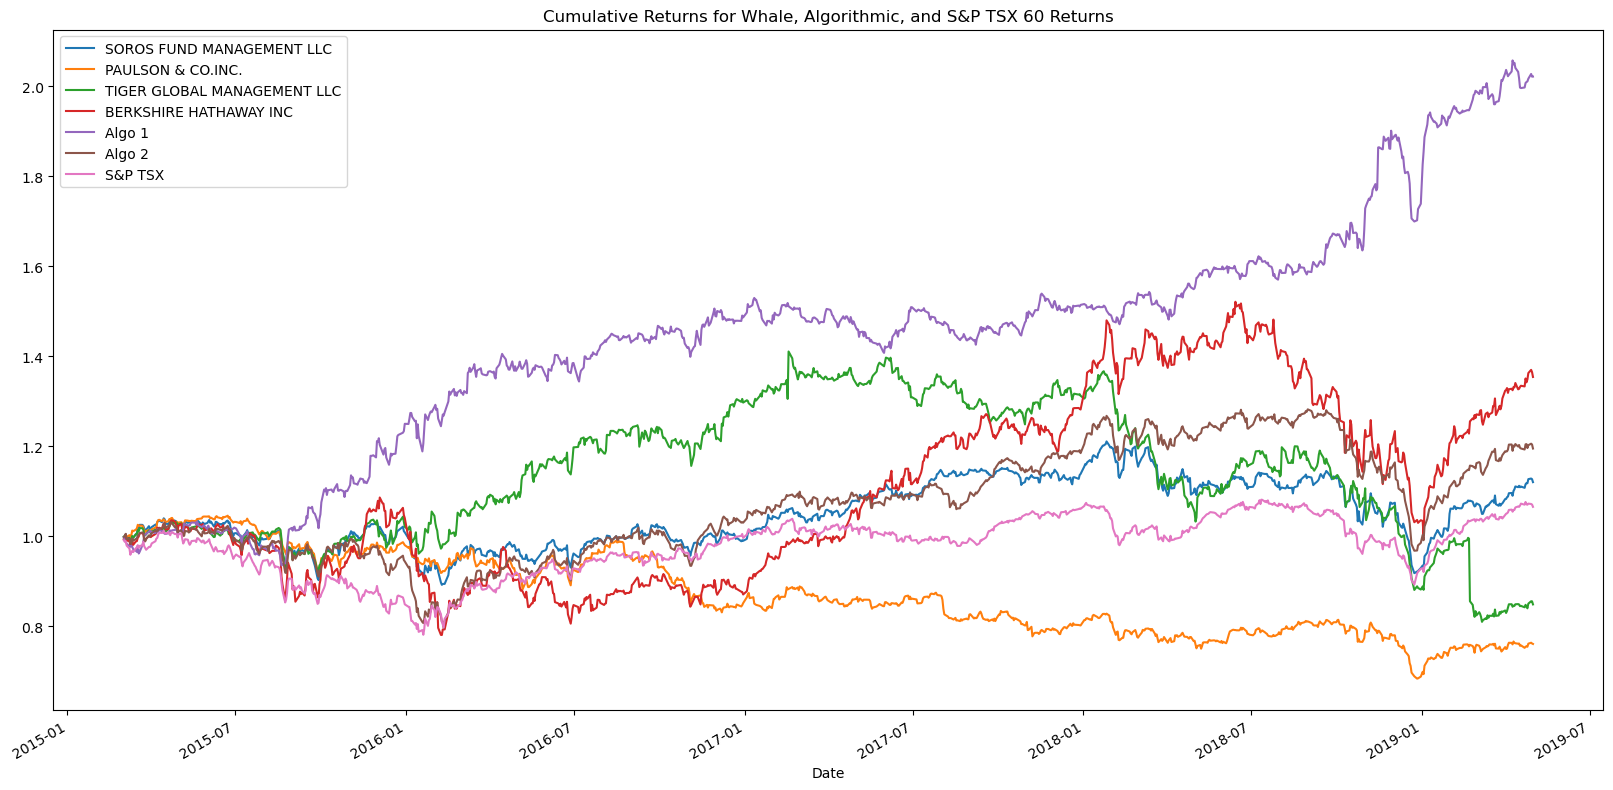

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_joined_w_a_sp = (1+joined_w_a_sp).cumprod()

# Plot cumulative returns
cumulative_joined_w_a_sp.plot(figsize=(20,10), title="Cumulative Returns for Whale, Algorithmic, and S&P TSX 60 Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Daily Returns for Whale, Algorithmic, and S&P TSX 60 Returns'}>

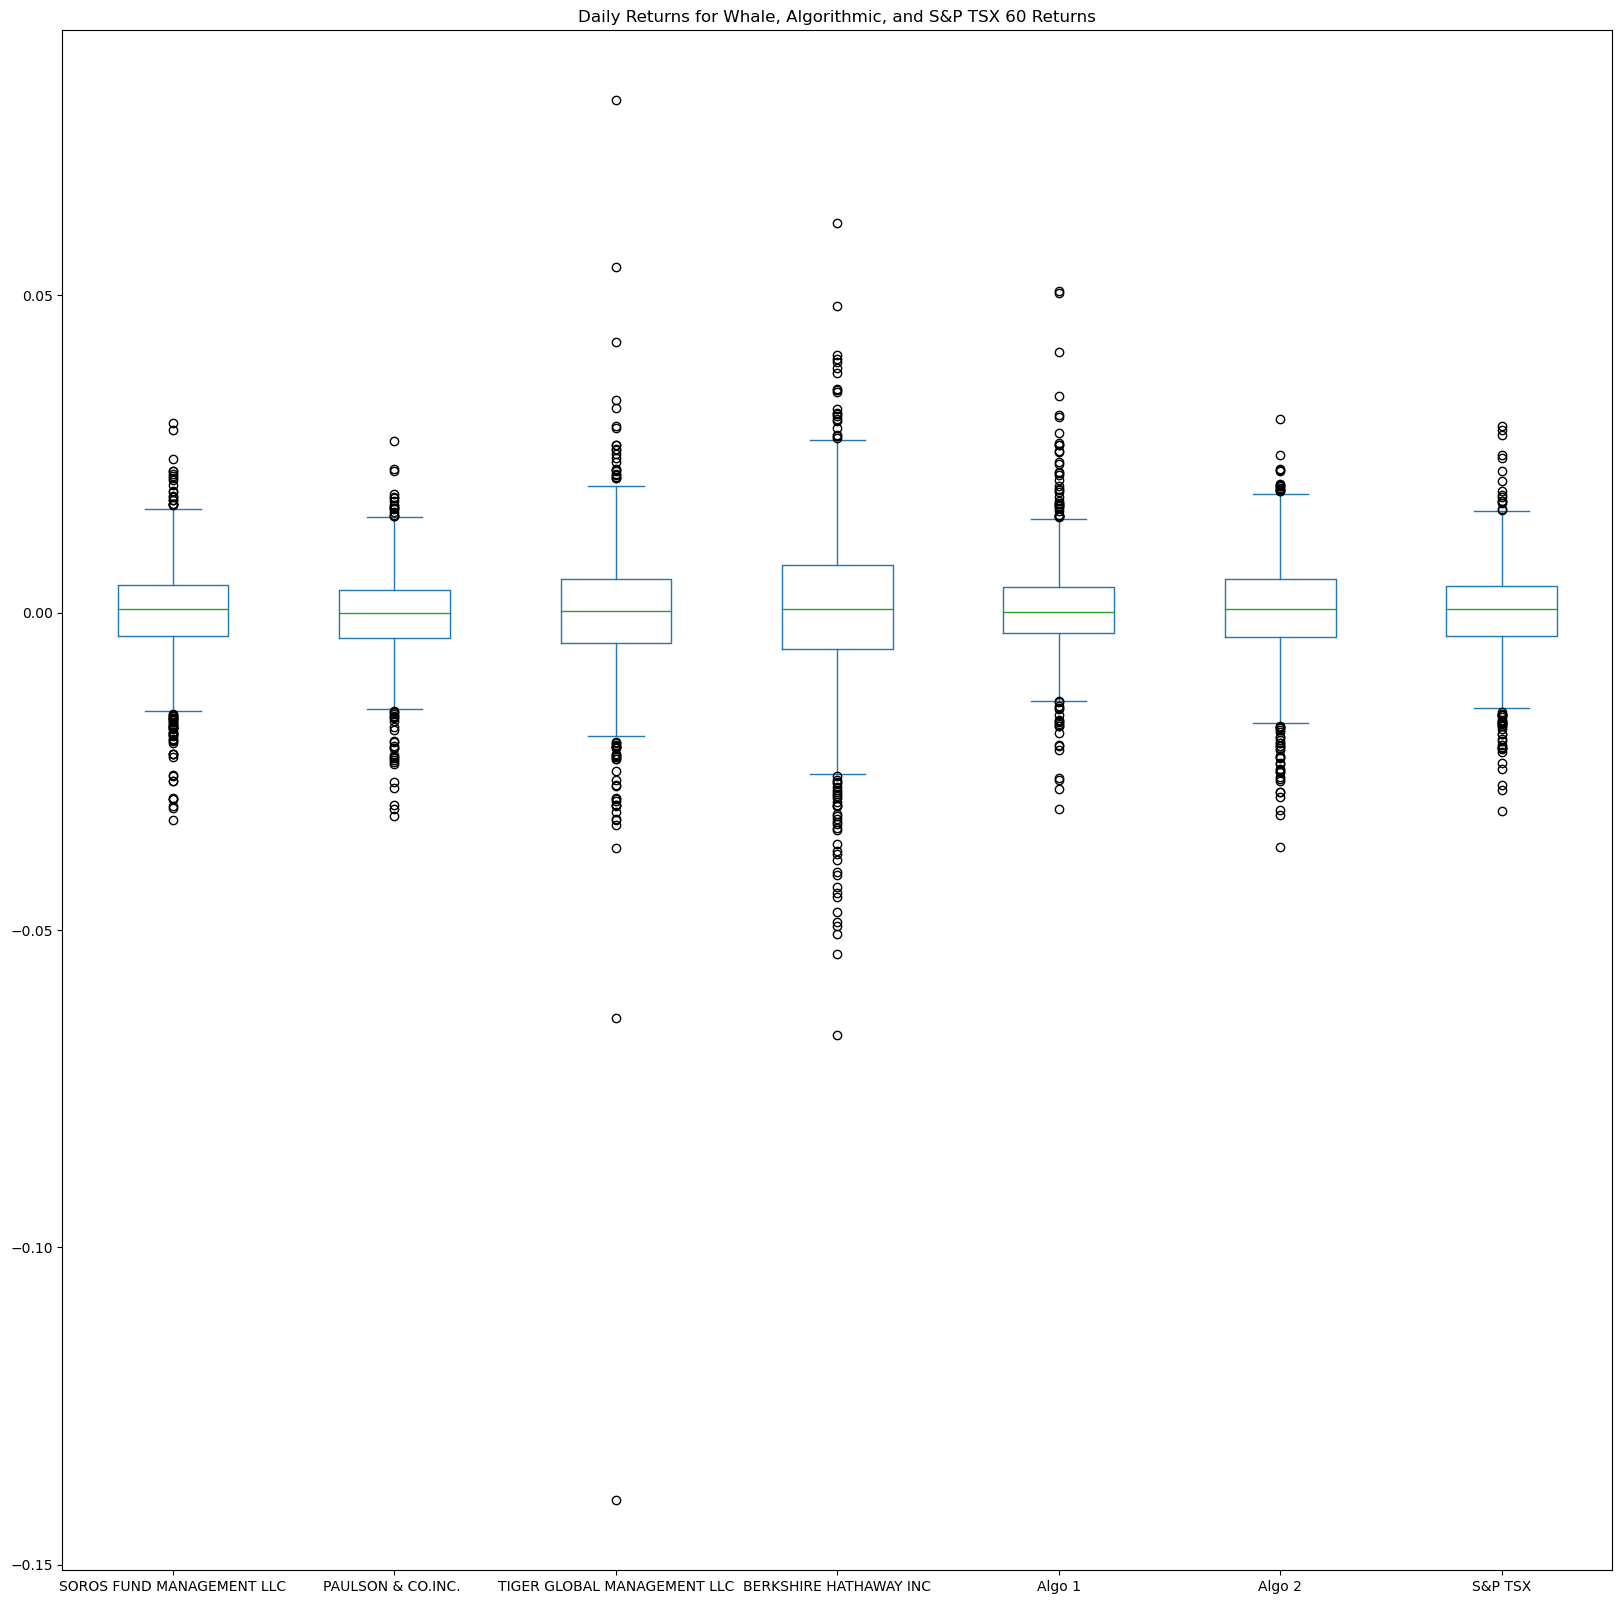

In [67]:
# Box plot to visually show risk
joined_w_a_sp.plot.box(figsize=(20,20), title="Daily Returns for Whale, Algorithmic, and S&P TSX 60 Returns")

### Calculate Standard Deviations

In [78]:
# Calculate the daily standard deviations of all portfolios
daily_std = joined_w_a_sp.std()
daily_std.sort_values(axis=0)

PAULSON & CO.INC.              0.006982
S&P TSX                        0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [80]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std_sp = joined_w_a_sp["S&P TSX"].std()

# Determine which portfolios are riskier than the S&P TSX 60
# In comparison to S&P TSX 60, Berkshire Hathaway Inc portfolio is much more volatile based on Box Plot data and standard deviation for each portfolio

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation of all portfoios'}, xlabel='Date'>

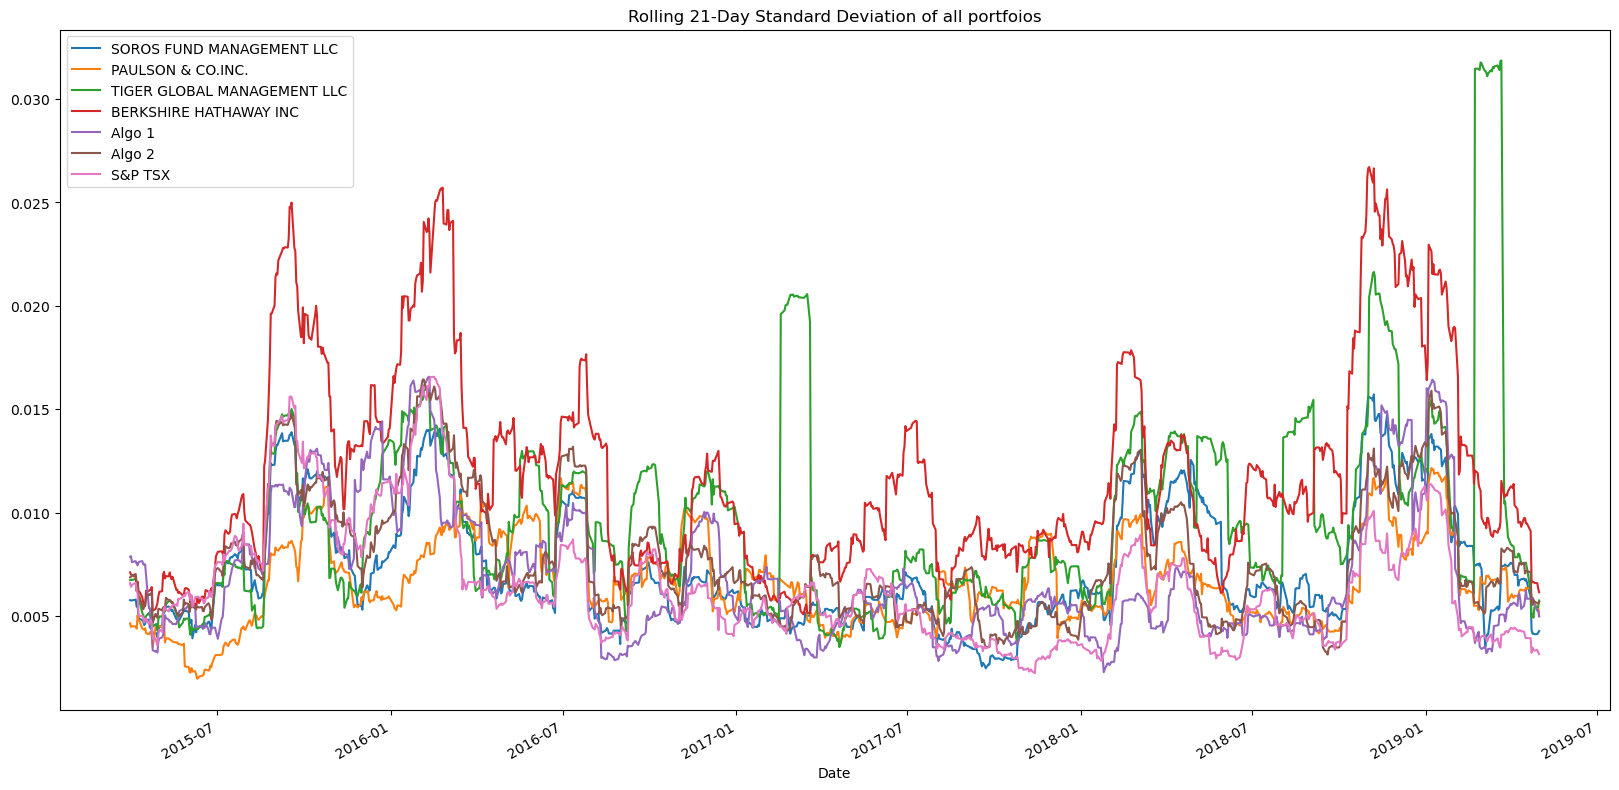

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_dev_all_portfolios = joined_w_a_sp.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_dev_all_portfolios.plot(figsize=(20,10), title="Rolling 21-Day Standard Deviation of all portfoios")

### Calculate and plot the correlation

<AxesSubplot:>

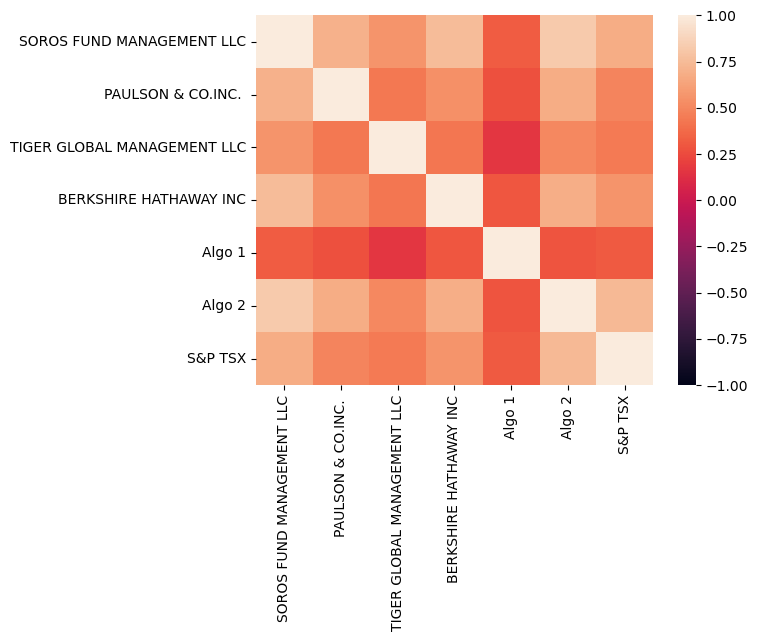

In [26]:
# Calculate the correlation
correlation = joined_w_a_sp.corr()
correlation

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 30-Day Covaiance of Algo 1 vs. S&P Returns'}, xlabel='Date'>

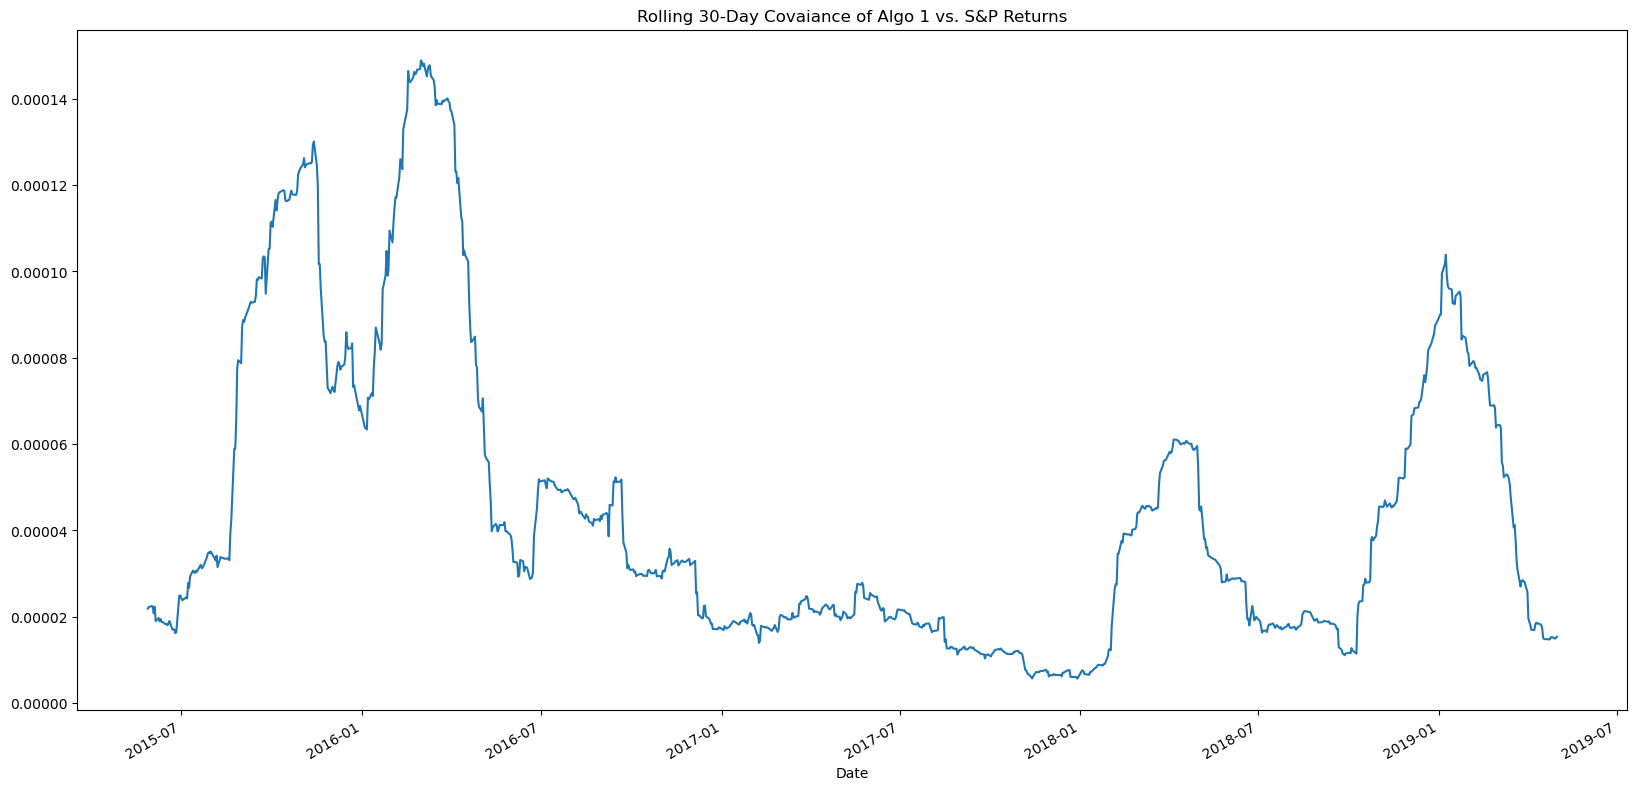

In [82]:
# Calculate covariance of a single portfolio: Chosen portfolio: Algo 2
covar_algo2_sp = joined_w_a_sp["Algo 2"].cov(joined_w_a_sp["S&P TSX"])

# Calculate variance of S&P TSX
tsx_var = joined_w_a_sp["S&P TSX"].var()

# Computing beta
algo2_beta = covar_algo2_sp / tsx_var
algo2_beta

# Plot 60 day algo 2 beta trend
algo2_beta_cov = joined_w_a_sp["Algo 2"].rolling(window=60).cov(joined_w_a_sp["S&P TSX"])
algo2_beta_cov.plot(figsize=(20,10), title="Rolling 30-Day Covaiance of Algo 1 vs. S&P Returns")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [84]:
# Use `ewm` to calculate the rolling window
joined_ewm = joined_w_a_sp.ewm(halflife=21).std()
joined_ewm.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517


<AxesSubplot:title={'center':'Rolling Statistics with 21-Day half-life'}, xlabel='Date'>

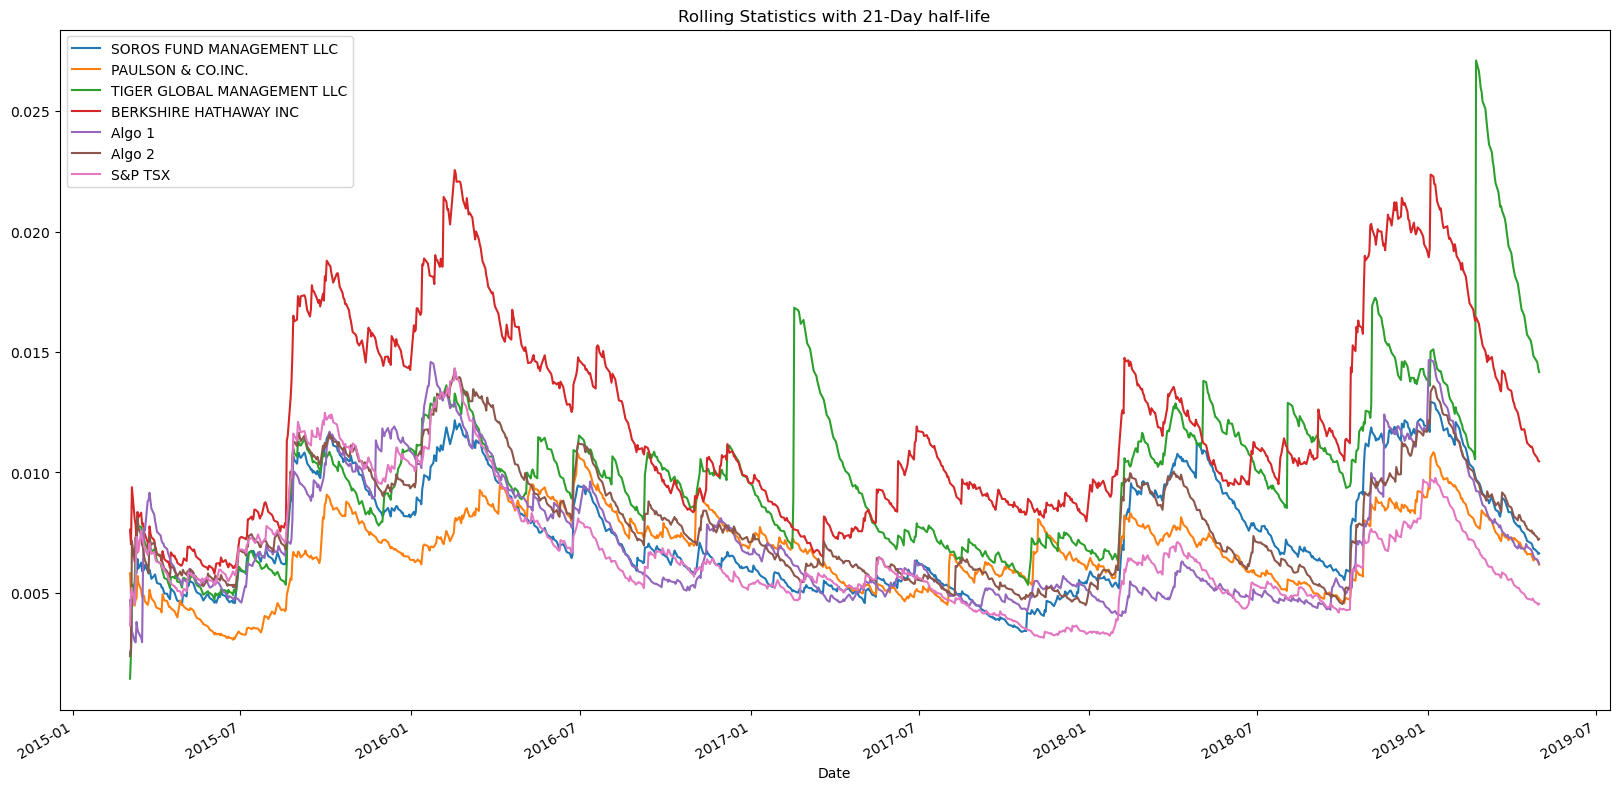

In [85]:
# Plot Exponentially Weighted Average with 21-Day half-life
joined_ewm.plot(figsize=(20,10), title="Rolling Statistics with 21-Day half-life")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_w_a_sp.mean() * 252)/(joined_w_a_sp.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of all portfolios'}>

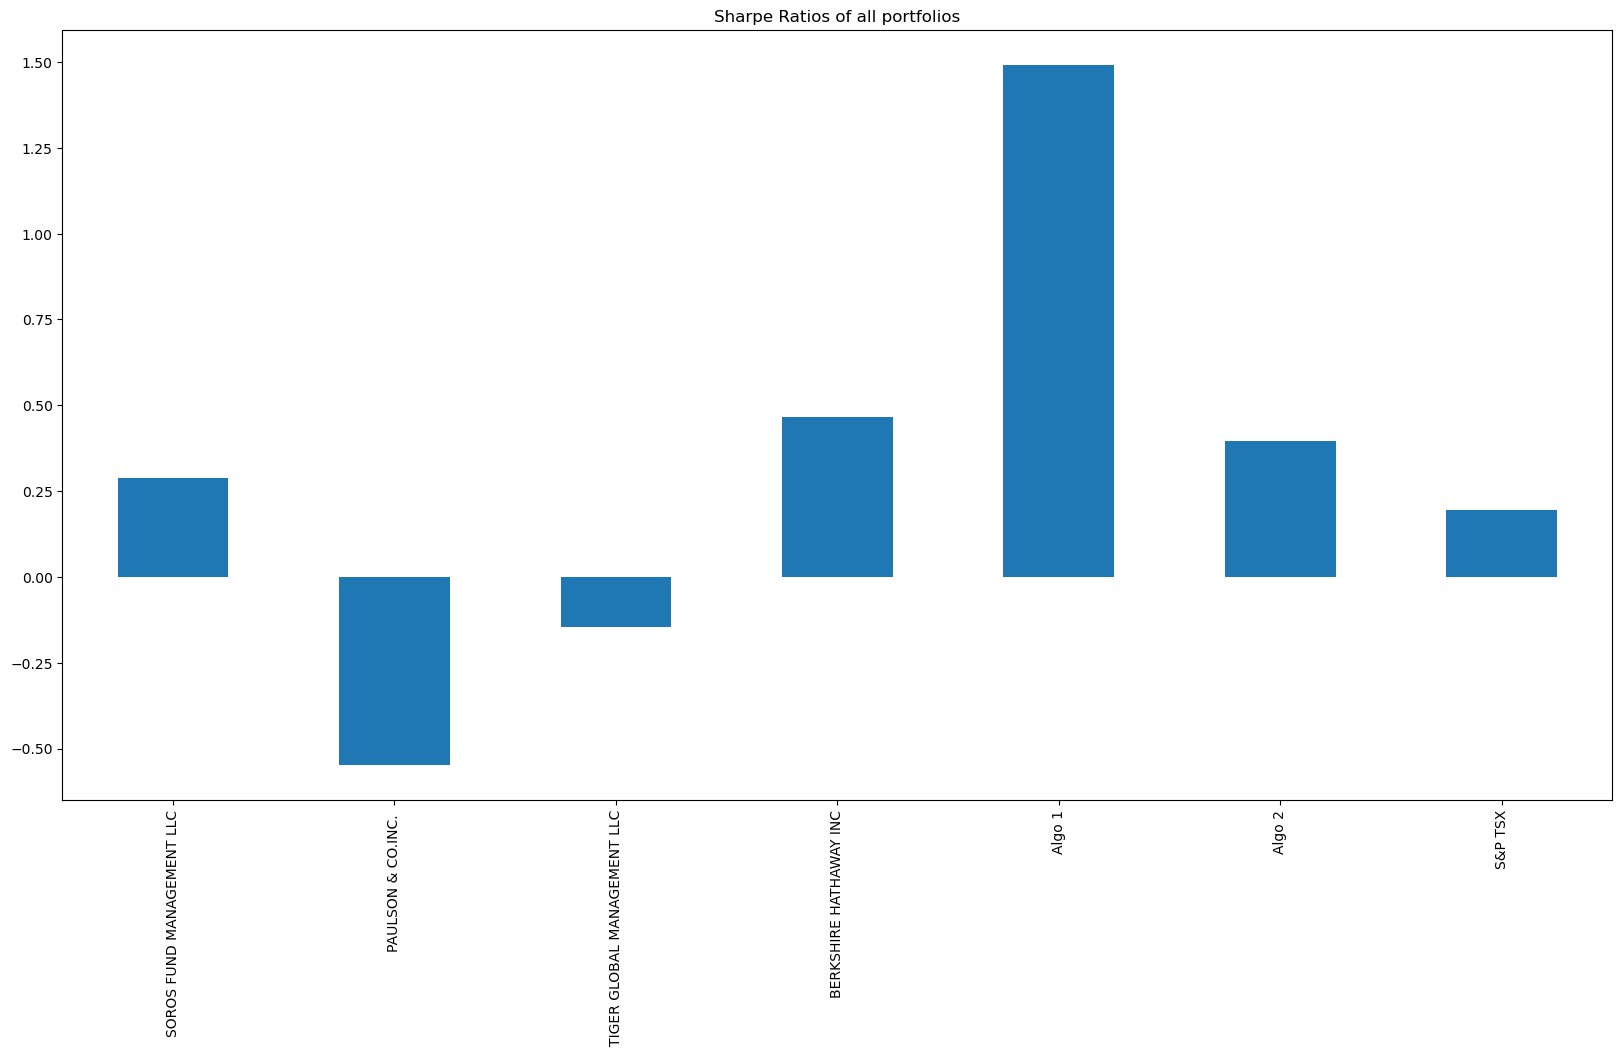

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize=(20,10), title="Sharpe Ratios of all portfolios")

In [68]:
# To compare the Whale's portfolio, Algo's portfolio and S&P portfolio, calculate each group's sharpe ration
# Create Whale, algo, sp returns
whale_returns = joined_w_a_sp.iloc[:,0:4]
algo_returns = joined_w_a_sp.iloc[:,4:6]
sp_returns = joined_w_a_sp["S&P TSX"]

# Calculate sharpe ratios
whale_sharpe_ratios = whale_returns.mean()*252/(whale_returns.std()*np.sqrt(252))
whale_sharpe_ratio_avg = whale_sharpe_ratios.mean()
algo_sharpe_ratios = algo_returns.mean()*252/(algo_returns.std()*np.sqrt(252))
algo_sharpe_ratio_avg = algo_sharpe_ratios.mean()
sp_sharpe_ratios = sp_returns.mean()*252/(sp_returns.std()*np.sqrt(252))

print("Whale" ,whale_sharpe_ratio_avg)
print("Algo", algo_sharpe_ratio_avg)
print("S&P", sp_sharpe_ratios)

Whale 0.015426198987596229
Algo 0.9441655376048226
S&P 0.19555028784301404


In [32]:
# Find out which portfolios are the best investment keichan needs to critique

def determine_best_portfolio(portfolio_name1, portfolio_name2, portfolio_name3, portfolio1, portfolio2, portfolio3):
    result_name = ""
    
    if portfolio1 >= portfolio2 and portfolio1 >= portfolio3:
        result_name = portfolio_name1
        result = portfolio1
        return result_name, result
    elif portfolio2 >= portfolio3:
        result_name = portfolio_name2
        result = portfolio2
        return result_name, result
    else: 
        result_name = portfolio_name3
        result = portfolio3
        return result_name3, result
        
        
return_value = determine_best_portfolio("Algo","Whale","S&P",algo_sharpe_ratio_avg, whale_sharpe_ratio_avg, sp_sharpe_ratios) 
        
        
print(f"{return_value[0]}'s portfolio's sharpe ratio is the best. It's sharpe ratio is {round(return_value[1],2)}")

Algo's portfolio's sharpe ratio is the best. It's sharpe ratio is 0.94


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.
After rigorous analysis of all portfolios, the Whales’s portfolio’s sharpe ratio is 0.154 whereas Algo’s sharpe ratio is 0.937. The S&P TSX 60’s sharpe ratio is 0.199. As a result, Harold’s combination of Algo 1 and Algo 2 outperforms Whale’s portfolio. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [33]:
# Reading data from 1st stock ==APPLE==
apple_df = pd.read_csv(csvpath_apple, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [34]:
# Reading data from 2nd stock ==MICROSOFT==
microsoft_df = pd.read_csv(csvpath_microsoft, index_col="Date",parse_dates=True, infer_datetime_format=True)

In [35]:
# Reading data from 3rd stock ==BROOKFIELD==
brookfield_df = pd.read_csv(csvpath_brookfield, index_col="Date",parse_dates=True, infer_datetime_format=True)

In [36]:
# Keep only Close column for each data
apple_daily_return = apple_df.drop(columns=["Open","High","Low","Volume"])
microsoft_daily_return = microsoft_df.drop(columns=["Open","High","Low","Volume"])
brookfield_daily_return = brookfield_df.drop(columns=["Open","High","Low","Volume"])

# Rename column name
apple_daily_return = apple_daily_return.rename(columns={"Close": "Apple"})
microsoft_daily_return = microsoft_daily_return.rename(columns={"Close": "Microsoft"})
brookfield_daily_return = brookfield_daily_return.rename(columns={"Close": "Brookfield"})

In [37]:
# Combine all stocks in a single DataFrame
my_daily_return = pd.concat([apple_daily_return,microsoft_daily_return,brookfield_daily_return], axis="columns", join="inner")
my_daily_return.head()

,Apple,Microsoft,Brookfield
Date,,,
2018-01-02 16:00:00,43.07,85.95,28.50
2018-01-03 16:00:00,43.06,86.35,28.62
2018-01-04 16:00:00,43.26,87.11,28.90
2018-01-05 16:00:00,43.75,88.19,28.89
2018-01-08 16:00:00,43.59,88.28,28.82


In [38]:
# Calculate daily returns
my_all_returns = my_daily_return.pct_change()

# Drop NAs
my_all_returns = my_all_returns.dropna().copy()

# Reset Date index
my_all_returns = my_all_returns.reset_index()

my_all_returns["Date"] = pd.to_datetime(my_all_returns["Date"]).dt.date
my_all_returns = my_all_returns.set_index("Date")

# Display sample data
my_all_returns.head()

,Apple,Microsoft,Brookfield
Date,,,
2018-01-03,-0.000232,0.004654,0.004211
2018-01-04,0.004645,0.008801,0.009783
2018-01-05,0.011327,0.012398,-0.000346
2018-01-08,-0.003657,0.001021,-0.002423
2018-01-09,-0.000229,-0.000680,0.000347


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [88]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = my_all_returns.dot(weights)

# Display sample data
my_portfolio_returns.head()

Date
2018-01-03    0.002877
2018-01-04    0.007743
2018-01-05    0.007793
2018-01-08   -0.001687
2018-01-09   -0.000187
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Join your returns DataFrame to the original returns DataFrame
total_returns = pd.concat([joined_w_a_sp,my_portfolio_returns], axis="columns", join="inner")
total_returns.head()

C:\Users\keito\anaconda3\envs\dev\lib\site-packages\pandas\core\indexes\base.py:334: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,0
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.002877
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.007743
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.007793
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.001687
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000187


In [89]:
# Change custom portfolio's column name to "My Portfolio"
total_returns = total_returns.rename(columns={0:"My Portfolio"})
total_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.002877
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.007743
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.007793
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.001687
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000187


In [90]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
My Portfolio                   0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized `std`
my_annualized_std = total_returns.std() * np.sqrt(252)
my_annualized_std

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX                        0.099121
My Portfolio                   0.206404
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation of all portfoios'}, xlabel='Date'>

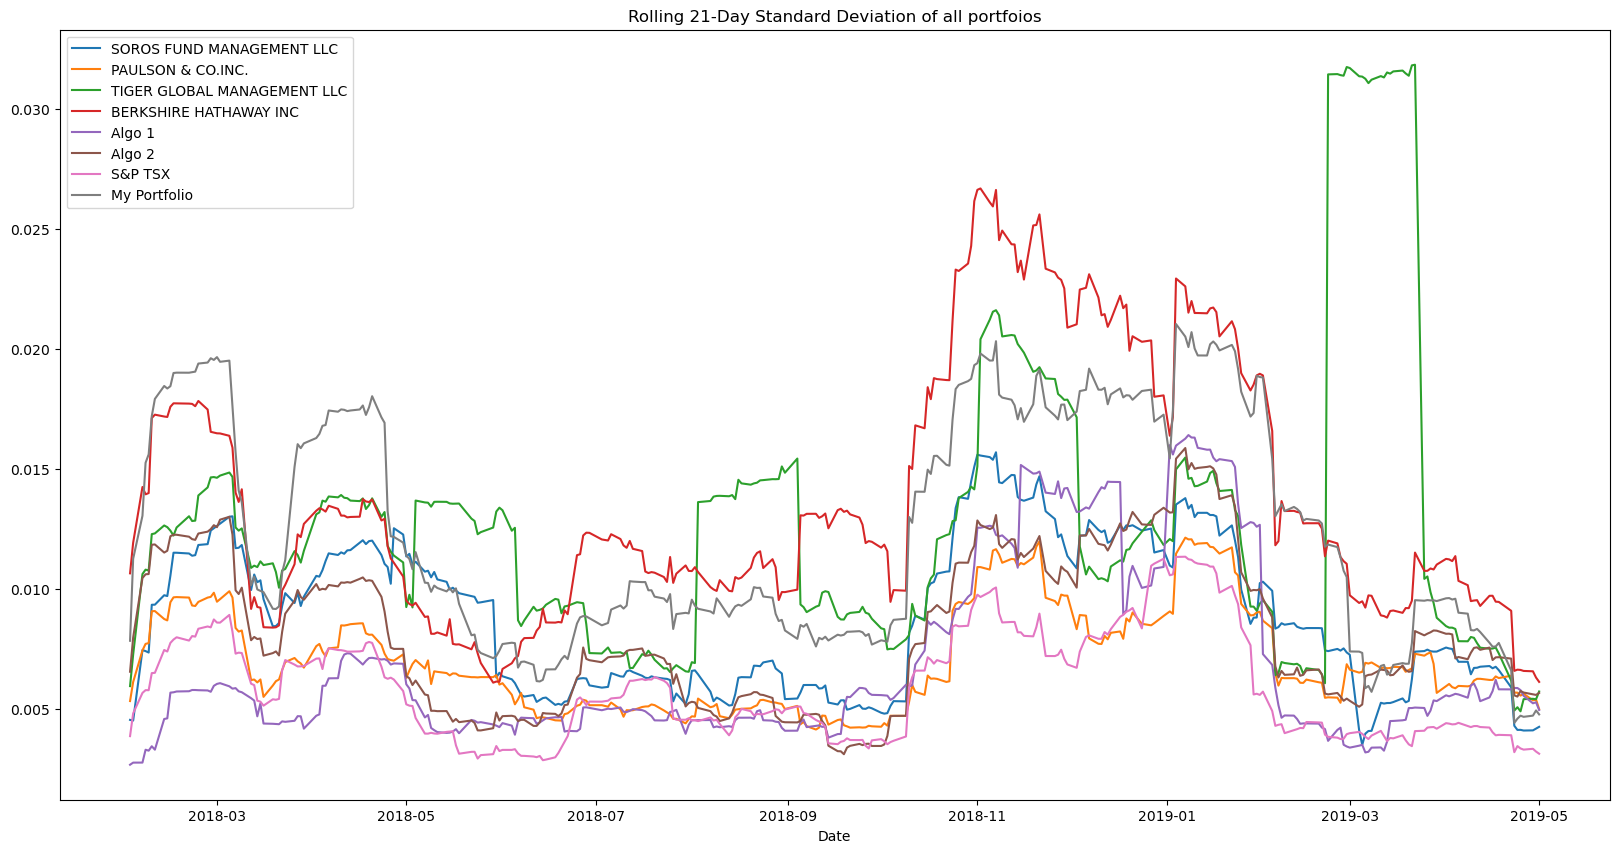

In [44]:
# Calculate rolling standard deviation
rolling_dev_all_my_portfolios = total_returns.rolling(window=21).std()

# Plot rolling standard deviation
rolling_dev_all_my_portfolios.plot(figsize=(20,10), title="Rolling 21-Day Standard Deviation of all portfoios")

### Calculate and plot the correlation

<AxesSubplot:>

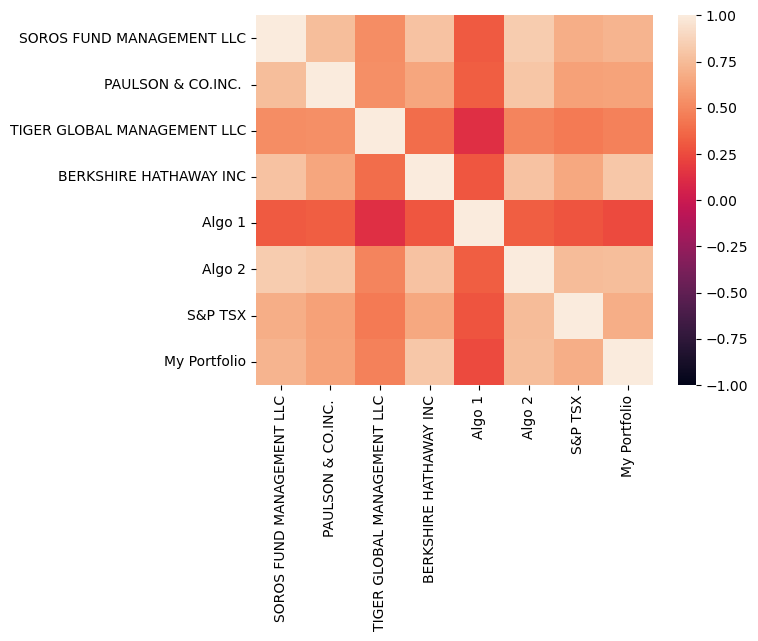

In [45]:
# Calculate and plot the correlation
correlation_with_myportfolio = total_returns.corr()

sns.heatmap(correlation_with_myportfolio, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [46]:
# Calculate and plot Beta
# Calculate covariance of my portfolio with S&P 60 TSX
covar_my_sp = total_returns["My Portfolio"].cov(total_returns["S&P TSX"])

# Calculate beta for my portfolio
my_beta = covar_my_sp / tsx_var
my_beta

1.1189553093804931

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualized Sharpe Ratios
all_sharpe_ratios = (total_returns.mean() * 252)/(total_returns.std() * np.sqrt(252))
all_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX                        0.034651
My Portfolio                   0.767706
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio for Whale, Algo, My Portfolio, and S&P 60 TSX'}>

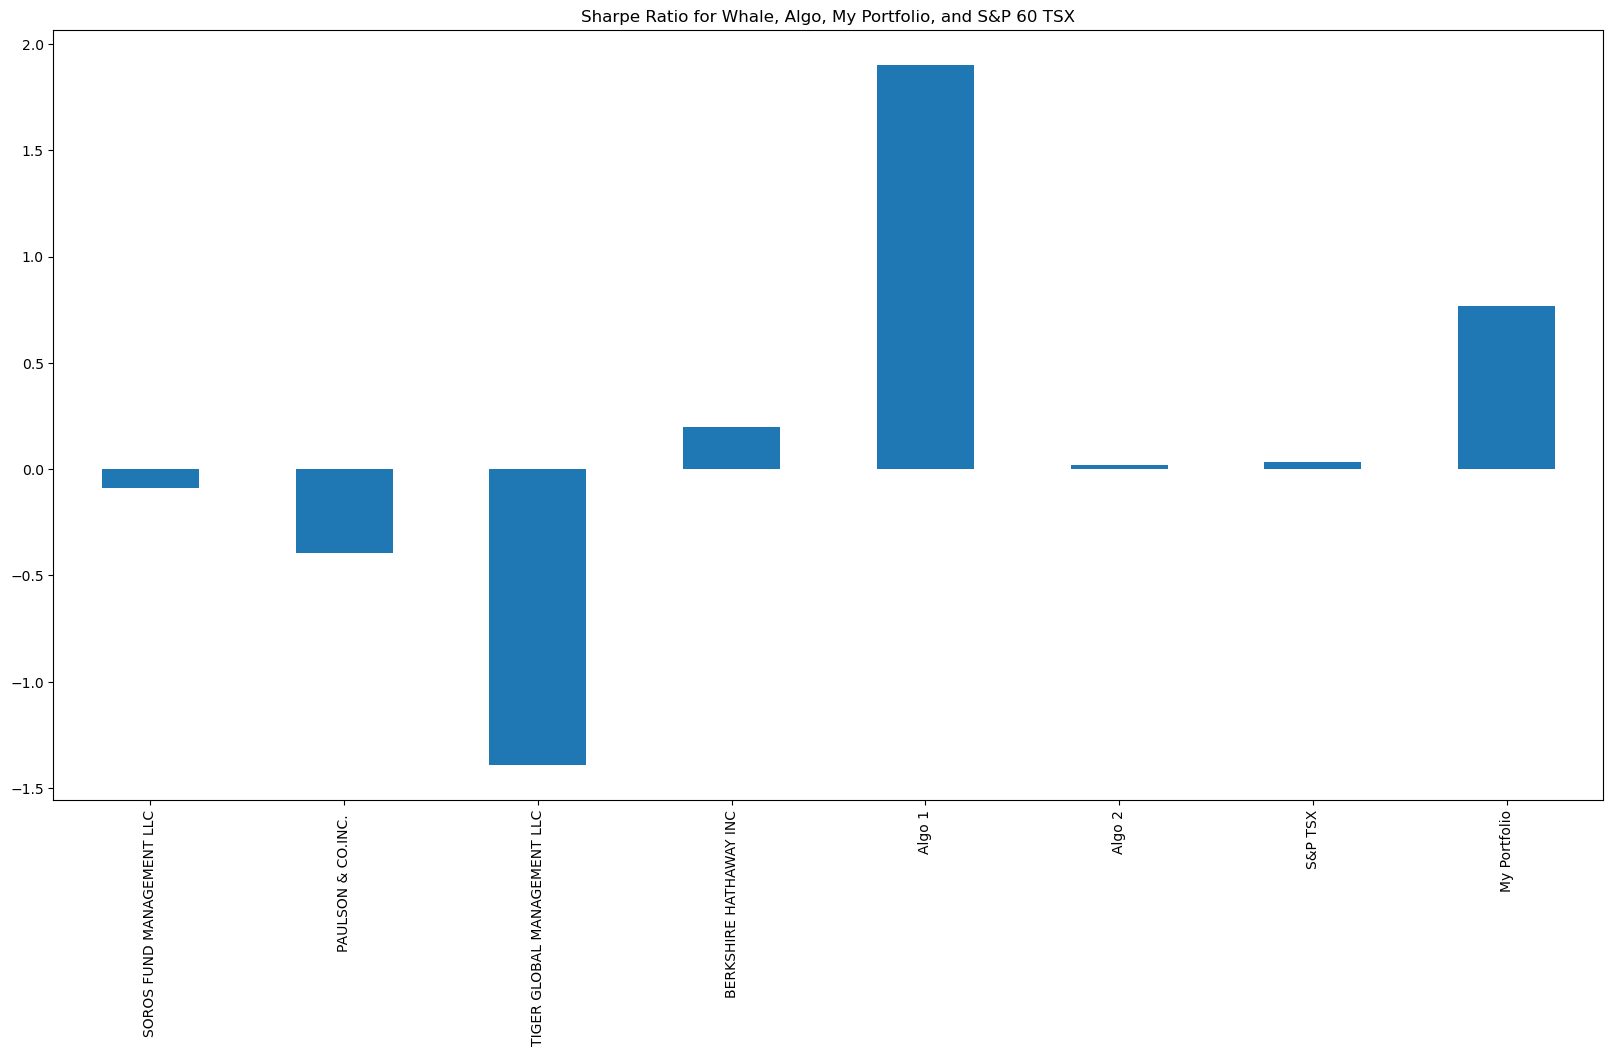

In [48]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind="bar", figsize=(20,10), title="Sharpe Ratio for Whale, Algo, My Portfolio, and S&P 60 TSX")

In [62]:
# To compare the Whale's portfolio, Algo's portfolio, my portfolio and S&P portfolio, since calculate each group's sharpe ratio of Whale's and Algo's are done, calculate my portfolio.
# Create my portfolio returns
whale_returns_v2 = total_returns.iloc[:,0:4]
algo_returns_v2  = total_returns.iloc[:,4:6]
sp_returns_v2 = total_returns["S&P TSX"]
my_returns = total_returns.iloc[:,7]

# Calculate sharpe ratios
whale_sharpe_ratios_v2 = whale_returns_v2.mean()*252/(whale_returns_v2.std()*np.sqrt(252))
whale_sharpe_ratio_avg_v2 = whale_sharpe_ratios_v2.mean()
algo_sharpe_ratios_v2 = algo_returns_v2.mean()*252/(algo_returns_v2.std()*np.sqrt(252))
algo_sharpe_ratio_avg_v2 = algo_sharpe_ratios_v2.mean()
sp_sharpe_ratios_v2 = sp_returns_v2.mean()*252/(sp_returns_v2.std()*np.sqrt(252))
my_portfolio_sharpe_ratio = my_returns.mean()*252/(my_returns.std()*np.sqrt(252))

print("Whale" ,round(whale_sharpe_ratio_avg_v2,3))
print("Algo", round(algo_sharpe_ratio_avg_v2,3))
print("S&P", round(sp_sharpe_ratios_v2,3))
print("My Portfolio", round(my_portfolio_sharpe_ratio,3))

Whale -0.42
Algo 0.961
S&P 0.035
My Portfolio 0.768


### How does your portfolio do?

Harold's portfolio (Algorithmic) outperforms by comparing the Sharpe ratios. The Sharpe ratio of Harold is 0.961. My portfolio follows Harold's portfolio, which is 0.768, shy of 0.2 less than his Sharpe ratio. Overall, my portfolio is far better than Whale's, which is -0.42.